In [1]:
# Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression 
# tasks, and even multioutput tasks. 
# Let's start by building a DecisionTreeClassifier on the iris dataset:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris["data"][:, 2:] # petal length, petal width
y = iris["target"]

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) 
tree_clf.fit(X, y)

# max_depth specifies the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure 
# or until all leaves contain less than min_samples_split samples

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [2]:
# You can visualize the trained Decision Tree by first using the export_graphviz() method to output a graph 
# definition called iris_tree.dot
from sklearn.tree import export_graphviz

export_graphviz (
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# Now you can convert this .dot file to a variety of formats such as PDF or PNG format using the dot command-line
# tool from the graphviz package on the terminal:
#
# dot -Tpng iris_tree.dot -o iris_tree.png
# This command line converts the .dot file to a .png file

In [3]:
# Let's do this again but this time no max_depth defines i.e., leave it None
tree_clf_no_depth = DecisionTreeClassifier(random_state=42)
tree_clf_no_depth.fit(X, y)

export_graphviz(
        tree_clf_no_depth,
        out_file="iris_tree_no_depth.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True,
    )

# dot -Tpng tree_clf_no_depth.odt -o tree_clf_no_depth.png
# Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children.
# However, there are other algorithms such as ID3 which produces decision trees with nodes that have more than two
# children.

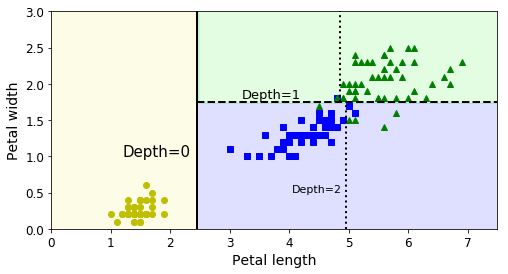

In [4]:
# Let's plot the decision boundary
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.2, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.8, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)
plt.show()

In [5]:
# A Decision Tree model can also estimate the probability that an instance belongs to a particular class k: first 
# first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training 
# instances of class k in this node. 

tree_clf.predict_proba([[5, 1.5]]) # 49/54

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

In [25]:
# The Classification And Regression Tree (CART) algorithm is used to train Decision Trees (also called growing 
# trees). The idea is quite simple: the algorithm first splits the training set in two subsets using a single 
# feature k and a threshold tk. It searches for the pair (k, tk) that produces the purest subsets.
# Once it has successfully split the training set in two, it splits the subsets using the same logic, then the 
# sub-subsets and so on, recursively. It stops recursing once it reaches the maximun depth (defined by the 
# max_depth hyperparameter), or if it cannot find a split that will reduce impurity.

# The code trains two Decision Trees on the moons dataset.
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.25, random_state=42)

# Decision Tree is trained with default hyperparameters i.e., no restrictions
tree_clf_no_res = DecisionTreeClassifier(random_state=42)
tree_clf_no_res.fit(X, y)

export_graphviz(
    tree_clf_no_res,
    out_file="tree_clf_no_clf.dot",
    rounded=True,
    filled=True,
)

# Decision Tree is trained with min_samples_leaf=4.
tree_clf_res = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf_res.fit(X, y)

export_graphviz(
    tree_clf_res,
    out_file="tree_clf_res.dot",
    rounded=True,
    filled=True,
)

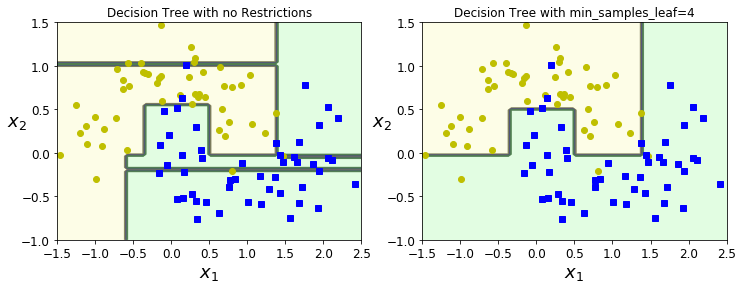

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("Decision Tree with no Restrictions")
plot_decision_boundary(tree_clf_no_res, X, y, axes=[-1.5, 2.5, -1.0, 1.5], iris=False)
plt.subplot(122)
plt.title("Decision Tree with min_samples_leaf=4")
plot_decision_boundary(tree_clf_res, X, y, axes=[-1.5, 2.5, -1.0, 1.5], iris=False)

# Here it is quite obvious that the model on the left is overfitting, and the model on the right will probably 
# generalize better.

In [27]:
# Decision Trees are also capable of performing regression tasks. Let's build a regression tree using Scikit-
# Learn's DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2
from sklearn.tree import DecisionTreeRegressor

m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

export_graphviz(
    tree_reg,
    out_file="tree_reg.dot",
    rounded=True,
    filled=True,     
)

In [28]:
# If you set the max_depth=3, you get the folloing model:
tree_reg_dep3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_dep3.fit(X, y)

export_graphviz(
    tree_reg_dep3,
    out_file="tree_reg_dep3.dot",
    rounded=True,
    filled=True,
)

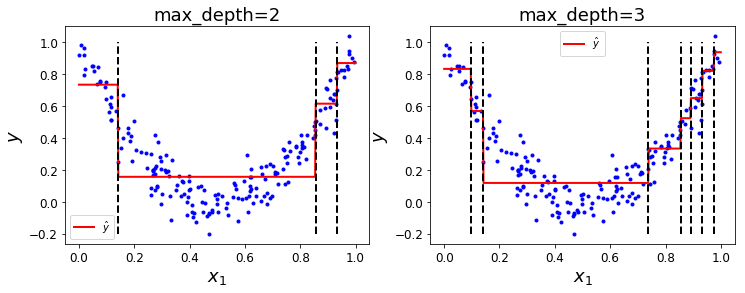

In [29]:
def plot_decision_boundary_reg(tree_reg, X, y, axes=[0, 1, -0.2, 1]):
    X_new = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(X_new)
    plt.plot(X_new, y_pred, "r-", label=r"$\hat{y}$", linewidth=2)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18)
    plt.legend()
    
    
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("max_depth=2", fontsize=18)
plt.plot(X, y, "b.")
plot_decision_boundary_reg(tree_reg, X, y, axes=[0, 1, -0.2, 1])
plt.plot([0.141, 0.141], [-0.2, 1], "k--", linewidth=2)
plt.plot([0.856, 0.856], [-0.2, 1], "k--", linewidth=2)
plt.plot([0.932, 0.932], [-0.2, 1], "k--", linewidth=2)

plt.subplot(122)
plt.title("max_depth=3", fontsize=18)
plt.plot(X, y, "b.")
plot_decision_boundary_reg(tree_reg_dep3, X, y, axes=[0, 1, -0.2, 1])
plt.plot([0.098, 0.098], [-0.2, 1], "k--", linewidth=2)
plt.plot([0.141, 0.141], [-0.2, 1], "k--", linewidth=2)
plt.plot([0.738, 0.738], [-0.2, 1], "k--", linewidth=2)
plt.plot([0.856, 0.856], [-0.2, 1], "k--", linewidth=2)
plt.plot([0.891, 0.891], [-0.2, 1], "k--", linewidth=2)
plt.plot([0.932, 0.932], [-0.2, 1], "k--", linewidth=2)
plt.plot([0.974, 0.974], [-0.2, 1], "k--", linewidth=2)


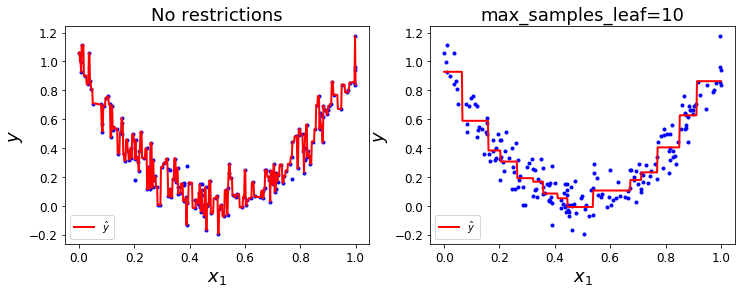

In [12]:
# Just for like classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks.
# Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left of 
# this figure. Just setting min_samples_leaf=10 generates a much more reasonable model.
tree_reg_no = DecisionTreeRegressor()
tree_reg_min_sam_leaf = DecisionTreeRegressor(min_samples_leaf=10)
tree_reg_no.fit(X, y)
tree_reg_min_sam_leaf.fit(X, y)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("No restrictions", fontsize=18)
plt.plot(X, y, "b.")
plot_decision_boundary_reg(tree_reg_no, X, y, axes=[0, 1, -0.2, 1])

plt.subplot(122)
plt.title("max_samples_leaf=10", fontsize=18)
plt.plot(X, y, "b.")
plot_decision_boundary_reg(tree_reg_min_sam_leaf, X, y, axes=[0, 1, -0.2, 1])

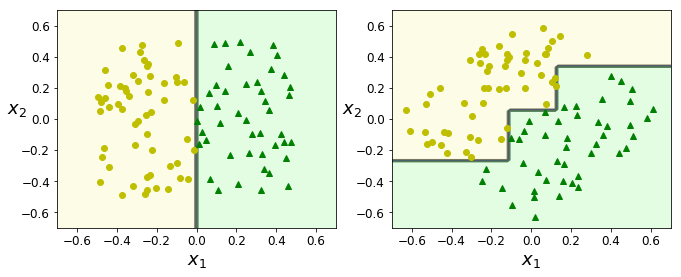

In [13]:
# Decision Trees are sensitive to training set rotation.

np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# Although both Decision Trees fit the training set perfectly, it is very likely that the model on the right will
# not generalize well.

In [14]:
# Let's train and fine-tune a Decision Tree for the moons dataset:

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_distributions = {"max_leaf_nodes": list(range(2, 100)), "min_samples_split": [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_distributions, n_jobs=-1, 
                                   verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    5.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       s

In [15]:
grid_search_cv.best_estimator_

# It predicts the best set of paramters is : max_leaf_nodes=4 and min_samples_split=2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [16]:
# Let's measure this model's performance on the test set.
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

# 86.95% accuracy!

0.8695

In [17]:
# Let's continue the previous model and try to generate a forest.
# First let's generate 1,000 subsets of the training set, each containing 100 instances selected randomly.

from sklearn.model_selection import ShuffleSplit

mini_sets = []
rs = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))


/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1788: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
# Let's train one decision tree on each subset, using the best hyperparameter values found above. Evaluate these
# 1,000 Decision Trees on the test set.

from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for i in range(1000)] # copy model to every 1,000 subsets

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

# Since these are trained on smaller sets, these Decision Trees perform worse than the first Decision Tree, 
# achieving only 80.65% accuracy.

0.8065545

In [19]:
# Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and 
# keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you 
# majority-vote predictions over the test set.
Y_pred = np.empty([1000, len(X_test)])

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [20]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [21]:
# Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first mode.
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

# 87% accuracy!

0.87

In [22]:
# Congratulations you trained your first Random Forest Classifier!